In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 10.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import ta
import plotly.graph_objects as go
plt.style.use("seaborn")

# https://technical-analysis-library-in-python.readthedocs.io/en/latest/

In [ ]:
def TA(ticker, start, end, interval="1d"):
  df = yf.download(ticker, start=start, end=end)
  candlestick = go.Candlestick(
      x = df.index,
      open = df["Open"],
      high = df["High"],
      low = df["Low"],
      close = df["Adj Close"])

  fig = go.Figure(data=[candlestick],
           layout=go.Layout(
        title=go.layout.Title(text="Candlestick Chart of "+ticker)))
  fig.show()

  df["EMA SHORT"] = ta.trend.ema_indicator(df["Adj Close"], window = 25) 
  df["EMA LONG"] = ta.trend.ema_indicator(df["Adj Close"], window = 50) 
  df["ADX"] = ta.trend.adx(df["High"], df["Low"], df["Adj Close"], window=14) 
  df["RSI"] = ta.momentum.rsi(df["Adj Close"], window=14, fillna=False) 
  df["KAMA"] = ta.momentum.kama(df["Adj Close"], window=10, pow1=2, pow2=30) 
  df["UPPER"] = ta.volatility.bollinger_hband(df["Adj Close"], window=20, window_dev=2, fillna=False)
  df["MIDDLE"] = ta.volatility.bollinger_mavg(df["Adj Close"], window=20, fillna=False)
  df["LOWER"] = ta.volatility.bollinger_lband(df["Adj Close"], window=20, window_dev=2, fillna=False)
  df["ULCER"] = ta.volatility.ulcer_index(df["Adj Close"], window=14, fillna=False)

  fig1, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(20,30))

  ax1.plot(df["Adj Close"])
  ax1.plot(df["EMA SHORT"])
  ax1.plot(df["EMA LONG"])
  ax1.set_ylabel("Price (in US$)")
  ax1.legend([ticker, "EMA SHORT", "EMA LONG"])
  ax1.set_title("Trend indicators: LONG-TERM AND SHORT-TERM EMAs of "+ticker)

  ax2.plot(df["ADX"])
  ax2.set_ylabel("ADX")
  ax2.set_title("Trend indicator: ADX of "+ticker)

  ax3.plot(df["RSI"])
  ax3.set_ylabel("RSI")
  ax3.set_title("Momentum indicator: RSI of "+ticker)

  ax4.plot(df["Adj Close"])
  ax4.plot(df["KAMA"])
  ax4.set_ylabel("Price (in US$)")
  ax4.legend([ticker,"KAMA"])
  ax4.set_title("Momentum indicator: KAMA of "+ticker)

  ax5.plot(df["Adj Close"])
  ax5.plot(df["UPPER"])
  ax5.plot(df["MIDDLE"])
  ax5.plot(df["LOWER"])
  ax5.set_ylabel("Price (in US$)")
  ax5.legend([ticker,"UPPER BAND","MIDDLE BAND","LOWER BAND"])
  ax5.set_title("Volatility indicator: BOLLINGER BANDS of "+ticker)

  ax6.plot(df["ULCER"])
  ax6.set_ylabel("ULCER")
  ax6.set_title("Volatility indicator: ULCER of "+ticker)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning:

invalid value encountered in double_scalars



[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


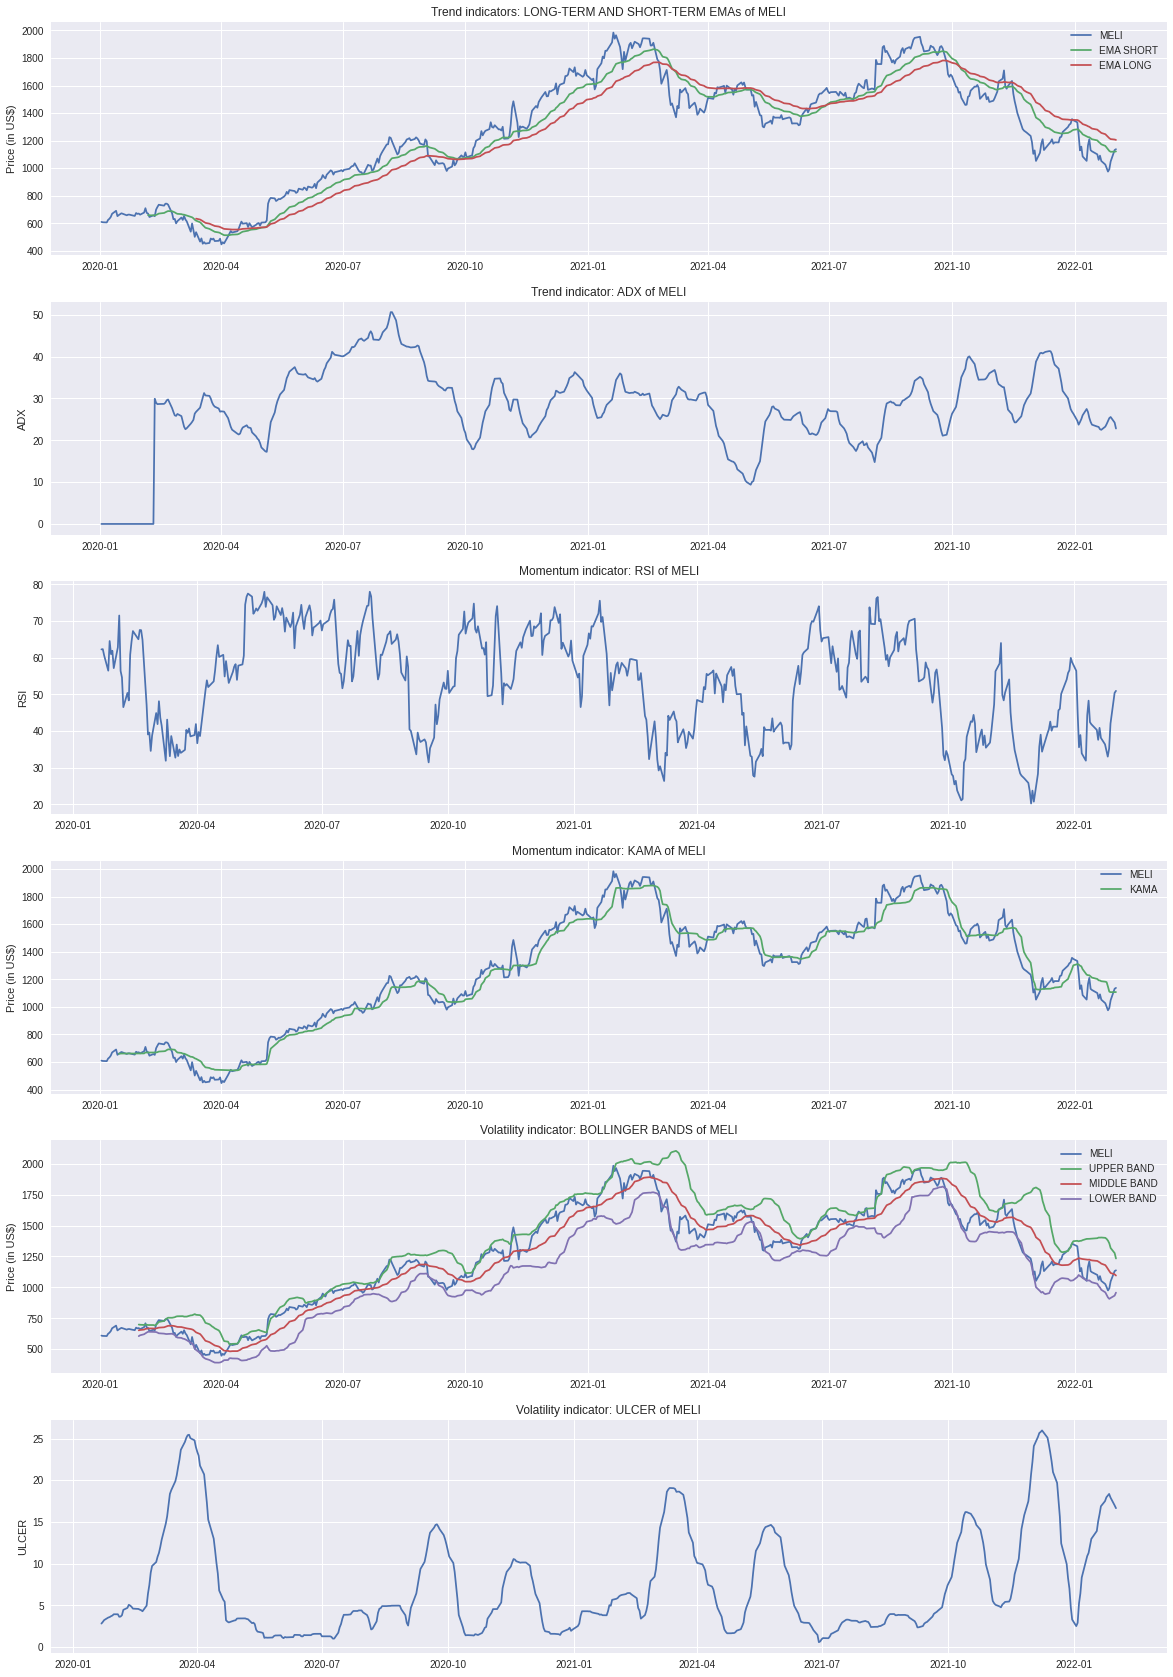

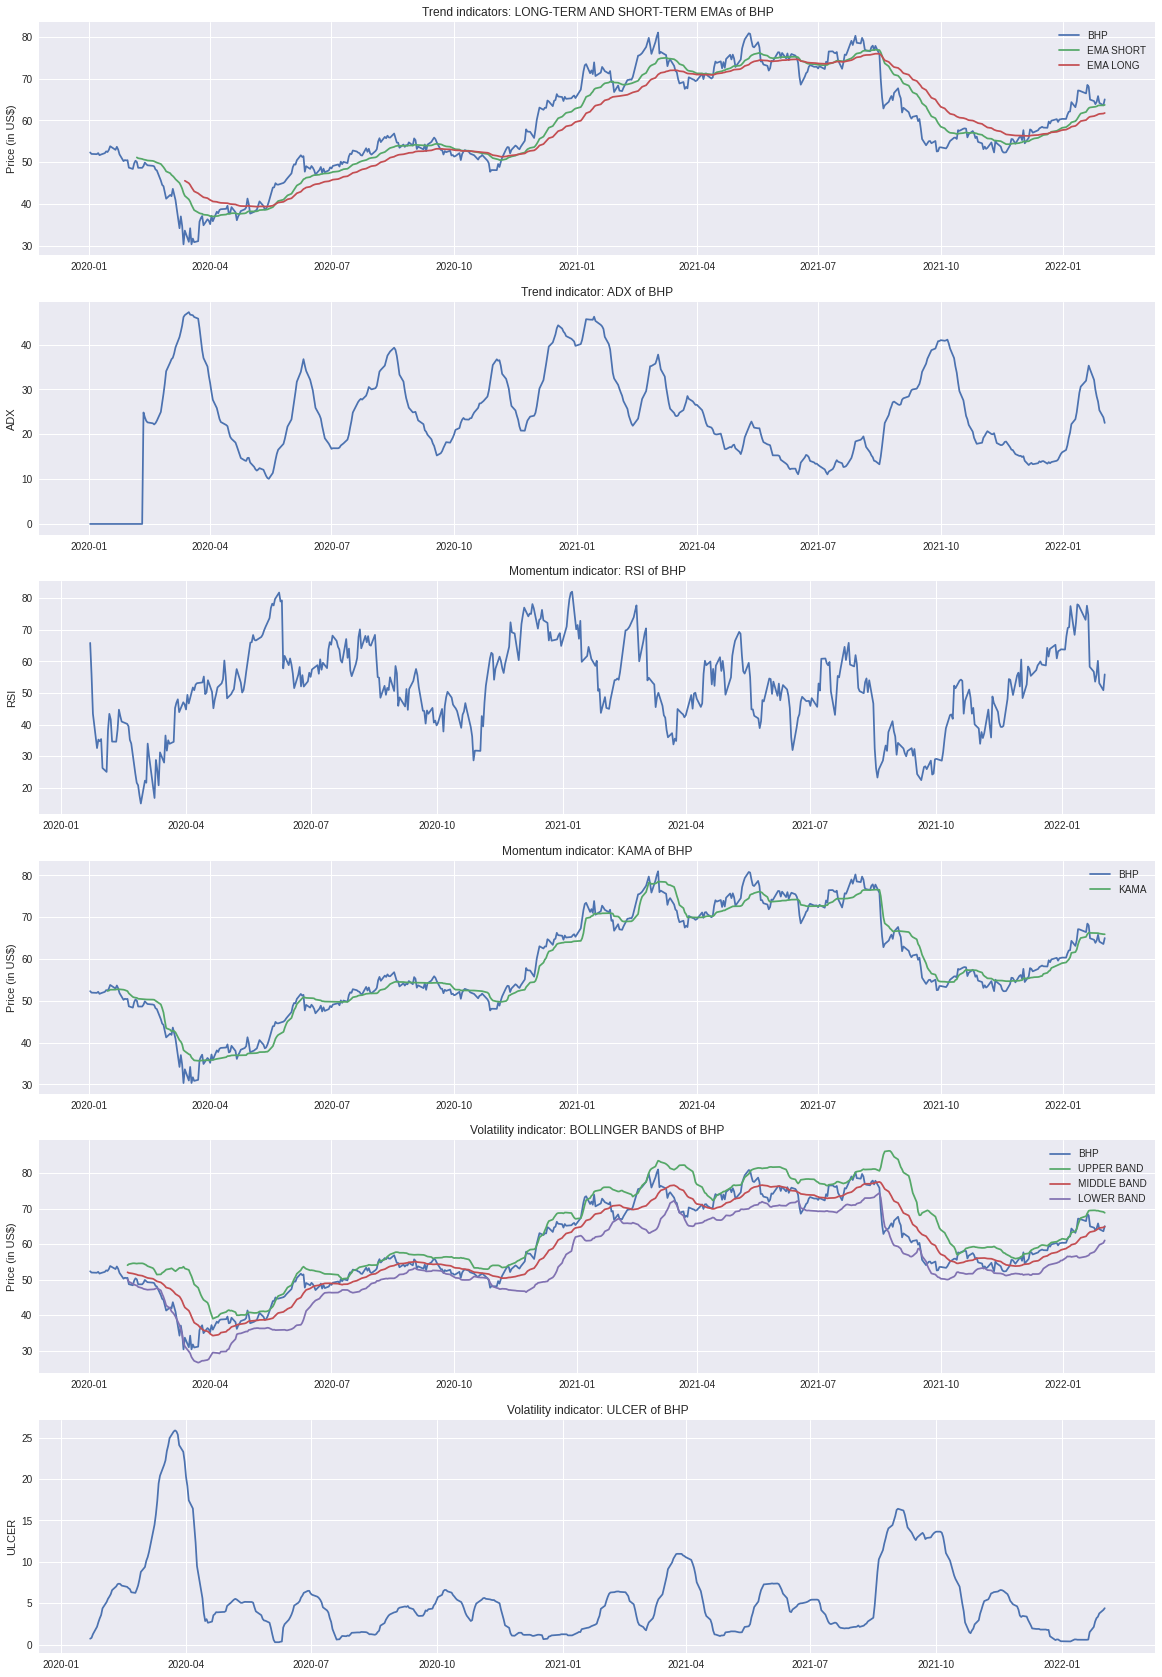

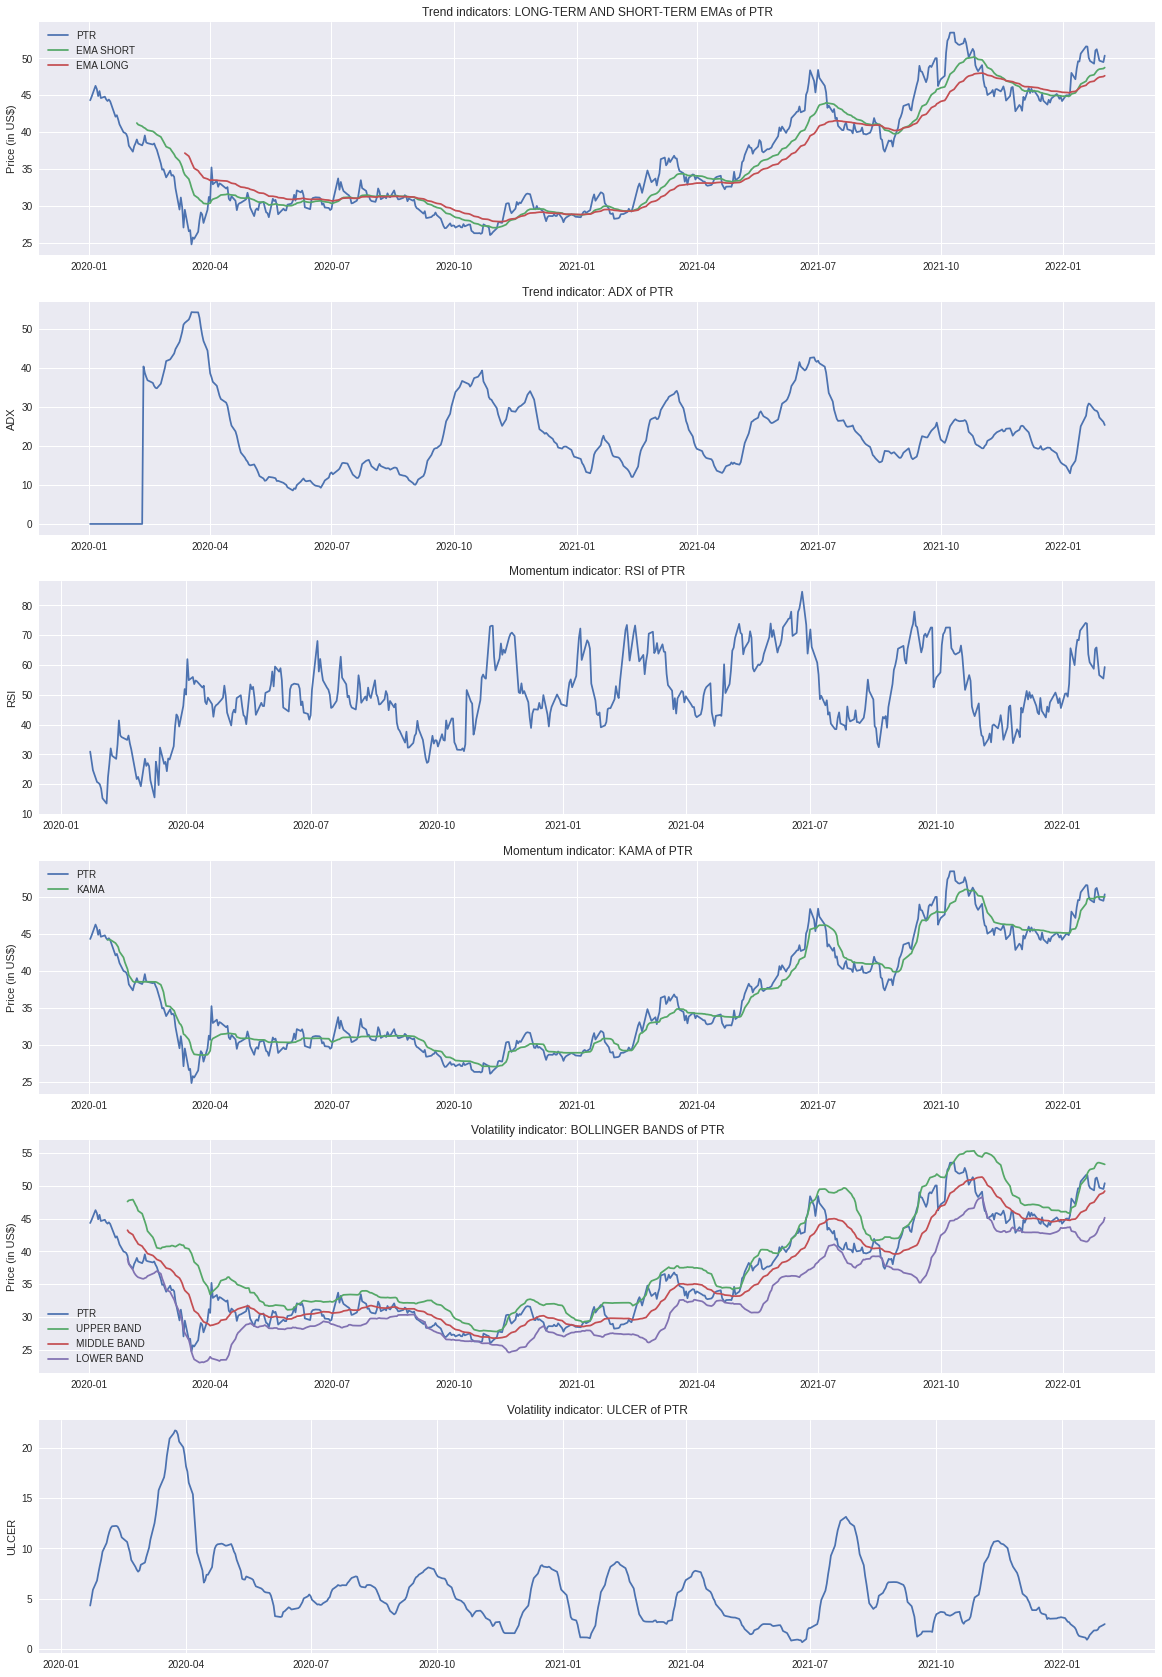

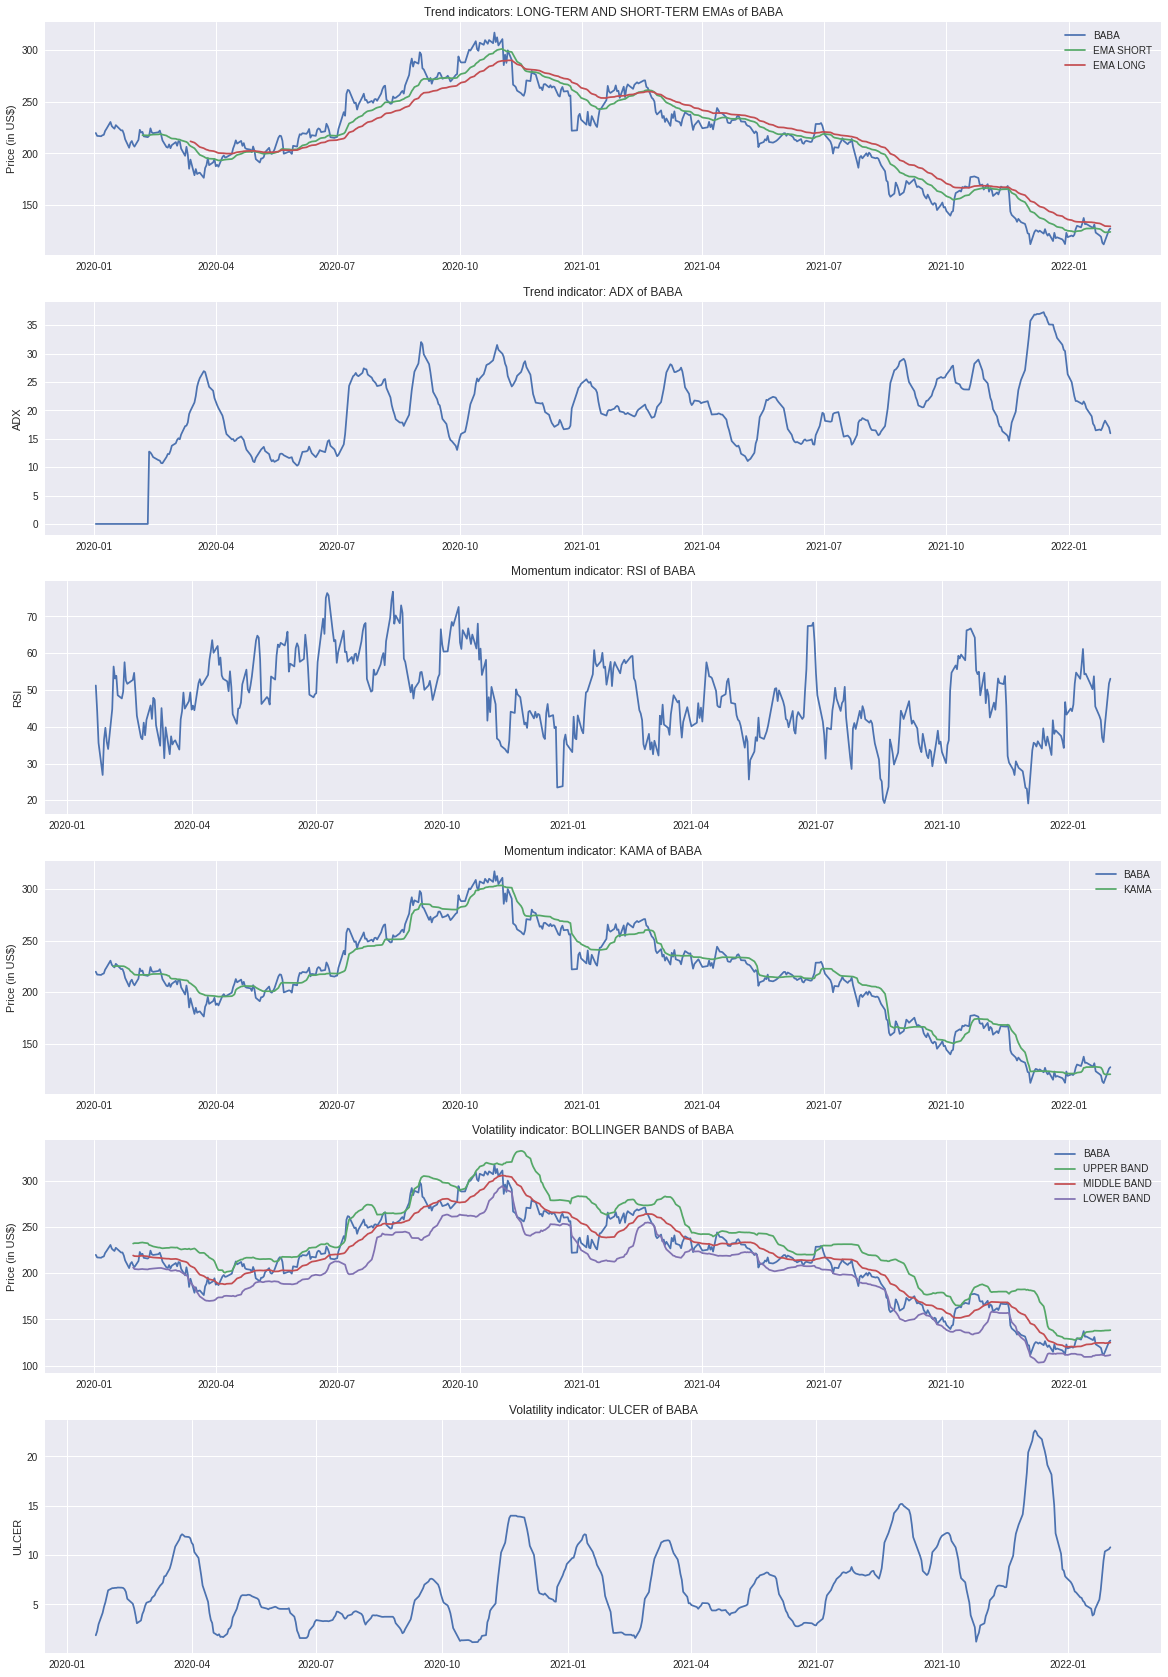

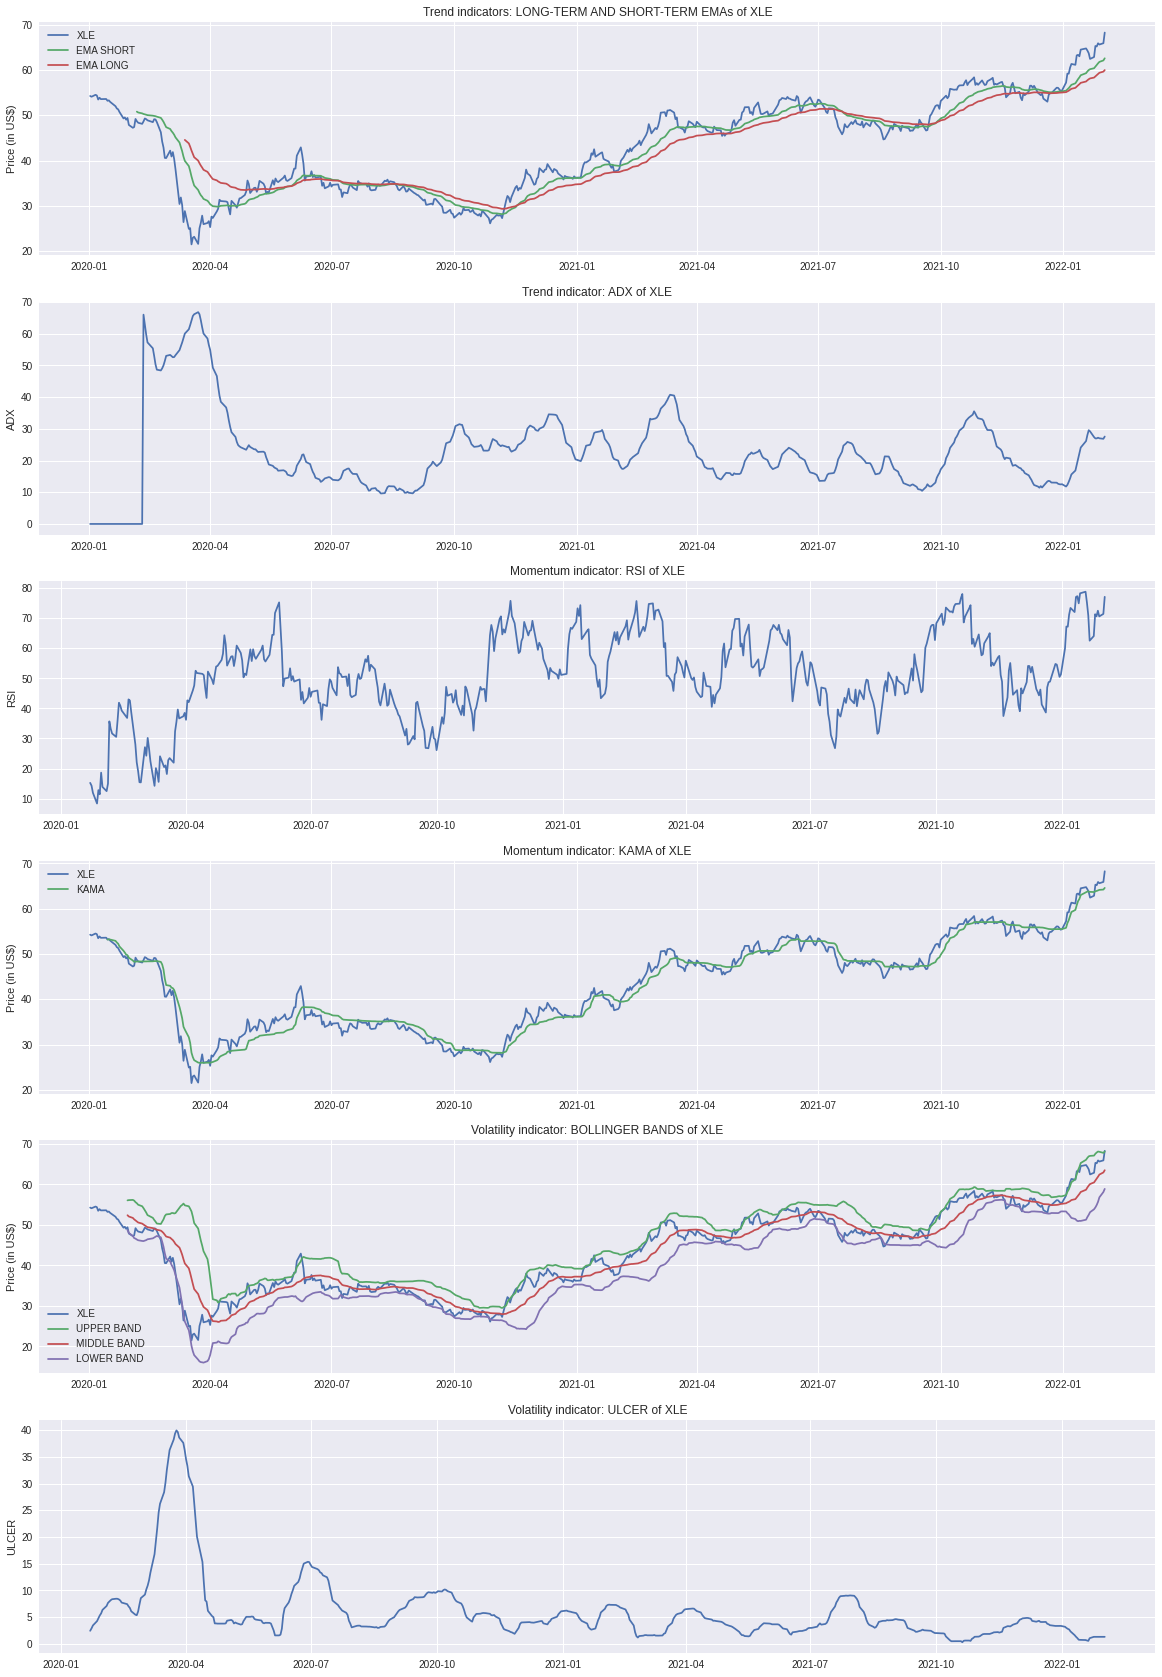

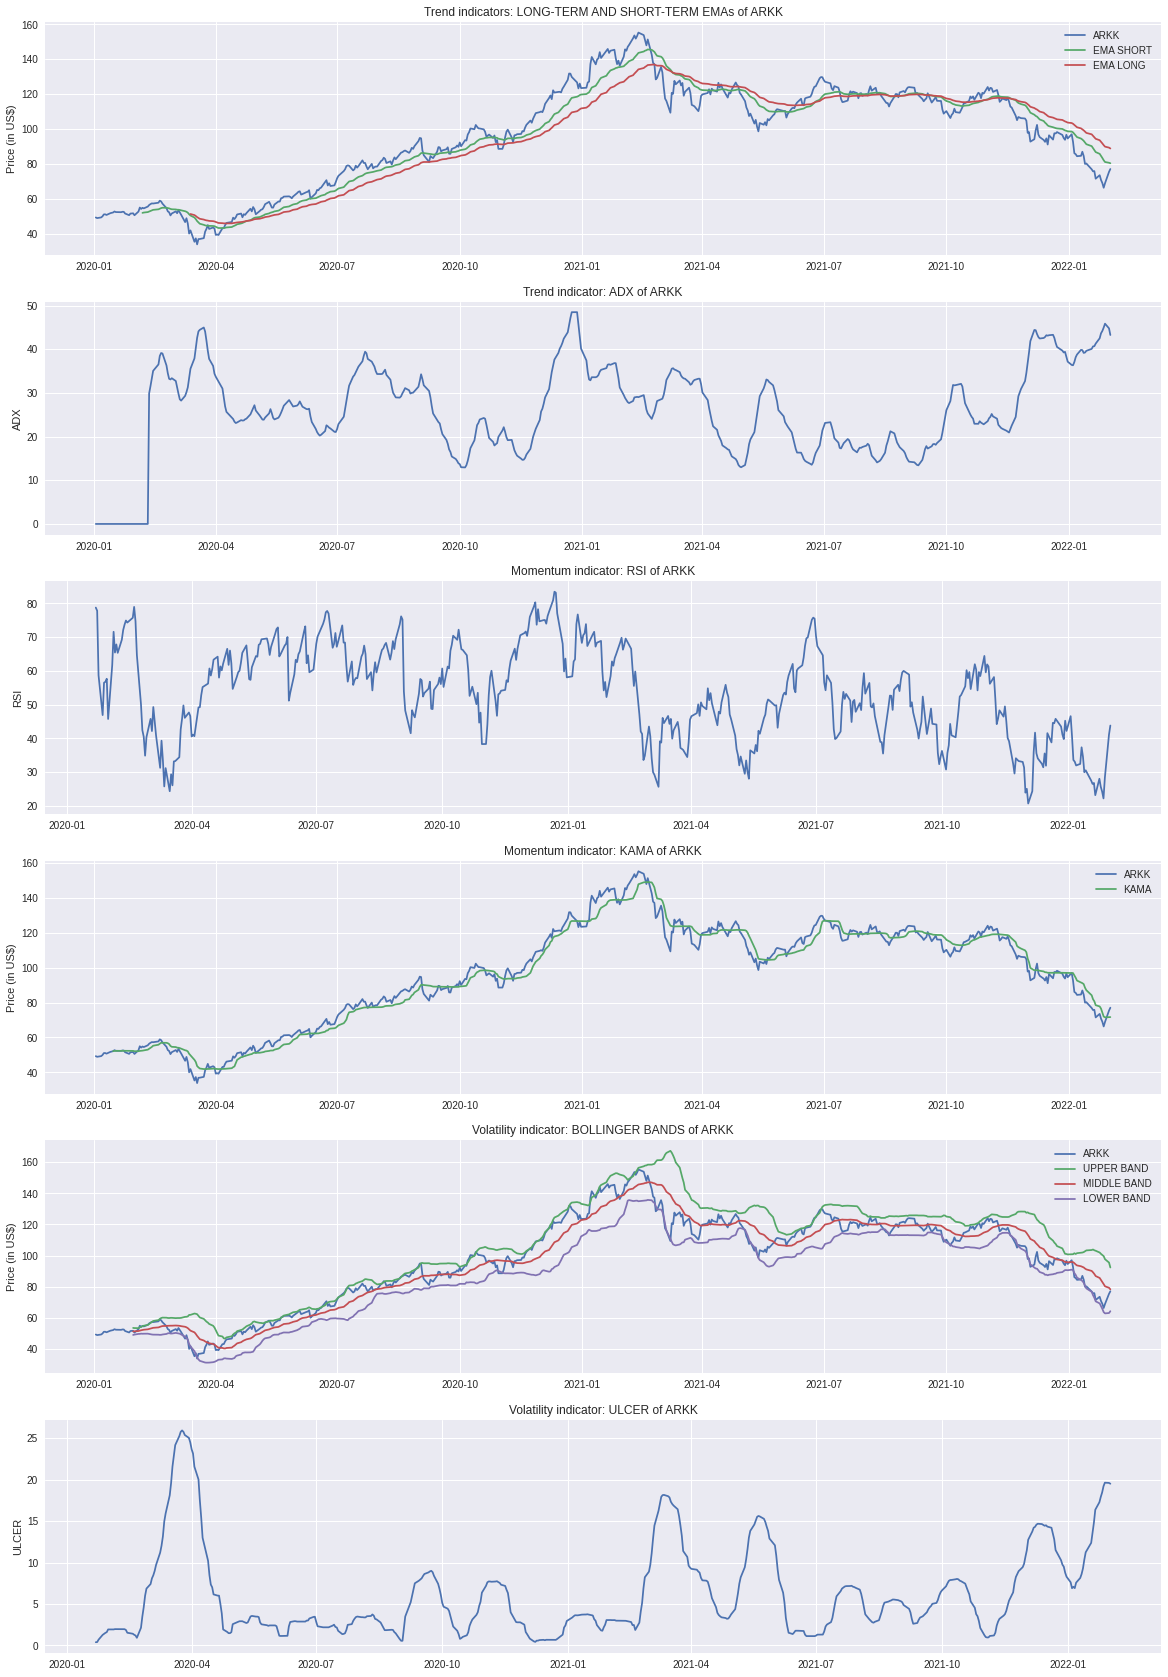

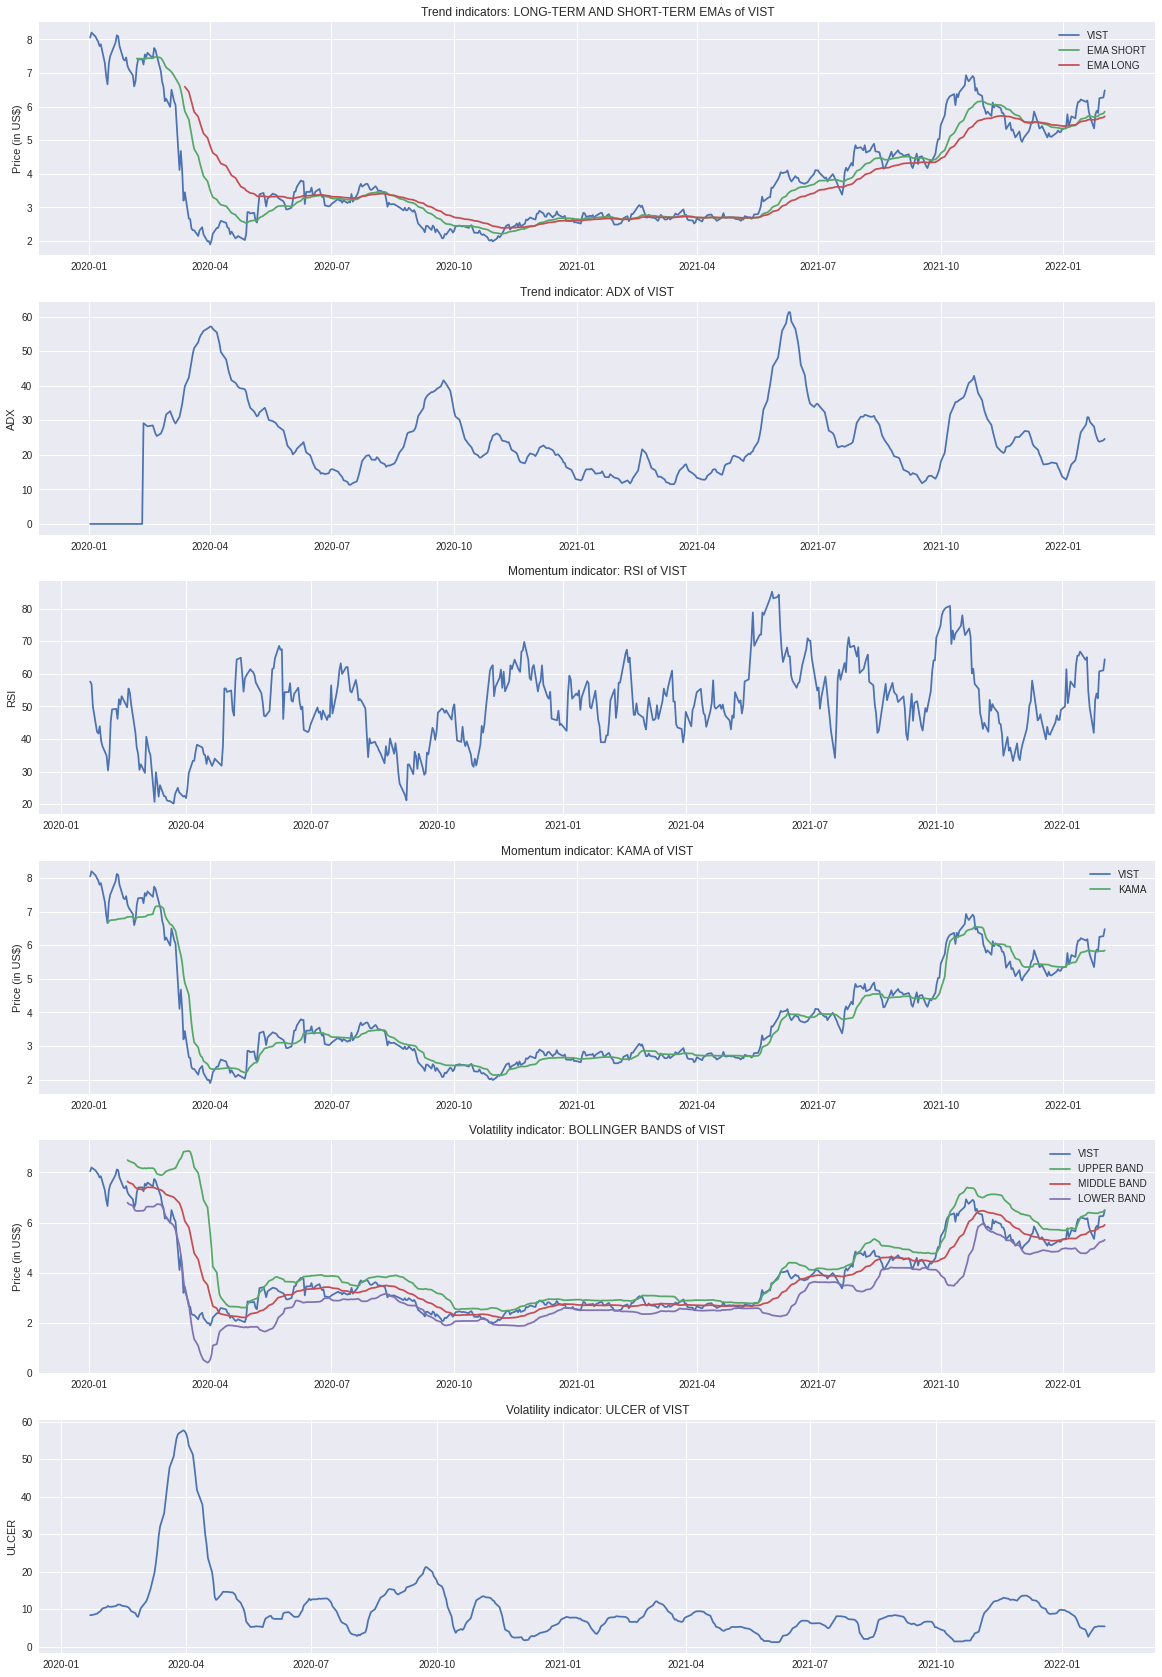

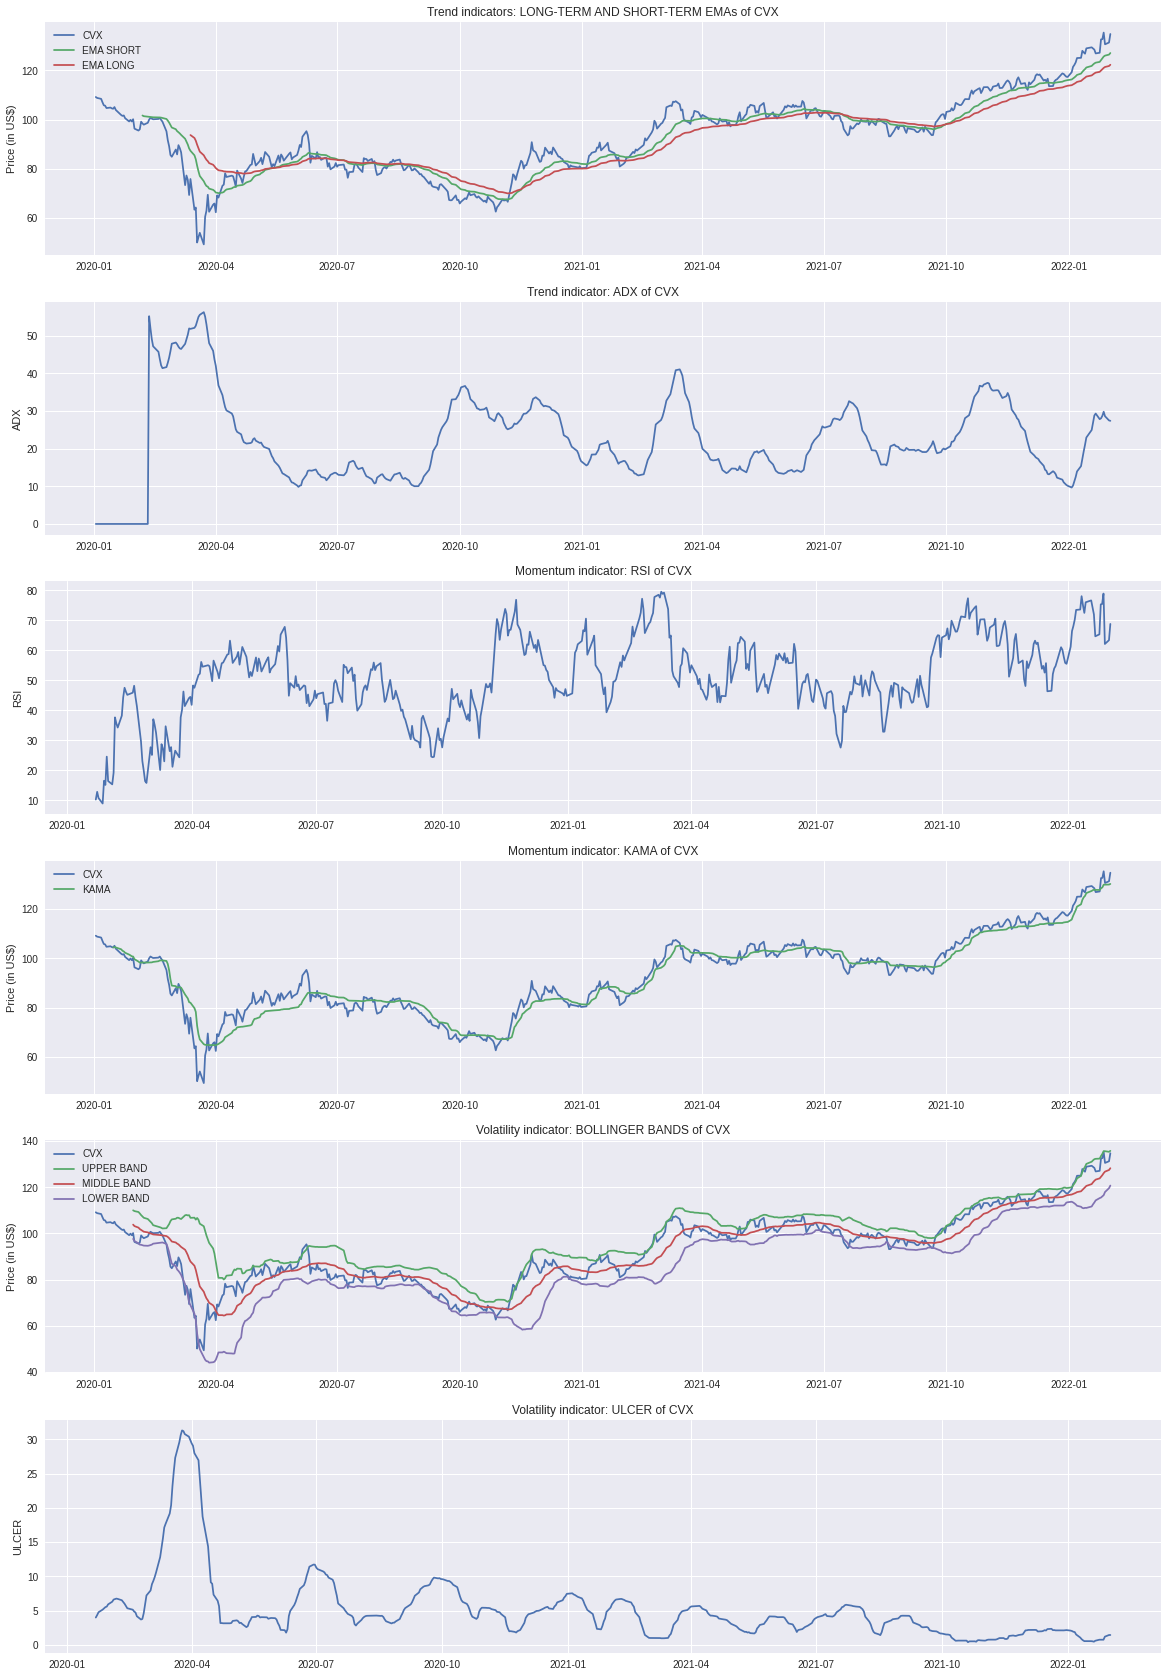

In [ ]:
tickers = ["MELI","BHP","PTR","BABA","XLE","ARKK","VIST","CVX"]

for ticker in tickers:
  TA(ticker, "2020-01-01","2022-02-02")